
<strong><center>Created by Riley Livingston @ https://github.com/Riley-livingston </center></strong>

### Predicting Airbnb Listings Prices/Night in NYC - Neural Networks, TensorFLow's Keras API

All Data sources and Data Info can be found here - http://insideairbnb.com/

### Creating a searchable dictionary for dataset feature descriptions and initial package imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_info = pd.read_csv("C:\\Users\\riley\\OneDrive\Desktop\\Data Portfolio Project\\airbnb_price_predictions\\airbnb_data\\Airbnb Data Dictionary.csv", index_col='Field')

In [3]:
print(data_info.loc['id']['Description'])

Airbnb's unique identifier for the listing


In [4]:
def feat_info(col_name):
     '''Feed feature name as the argument. Returns the description of the feature.'''
     print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('price')

daily price in local currency


 ### Converting the CSV file into a Pandas DataFrame

In [6]:
df = pd.read_csv("C:\\Users\\riley\\OneDrive\Desktop\\Data Portfolio Project\\airbnb_price_predictions\\airbnb_data\\listings.csv")

C:\Users\riley\AppData\Local\Temp\ipykernel_2800\3522405283.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\riley\\OneDrive\Desktop\\Data Portfolio Project\\airbnb_price_predictions\\airbnb_data\\listings.csv")


### Data Cleaning and Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            39881 non-null  int64  
 1   listing_url                                   39881 non-null  object 
 2   scrape_id                                     39881 non-null  int64  
 3   last_scraped                                  39881 non-null  object 
 4   source                                        39881 non-null  object 
 5   name                                          39868 non-null  object 
 6   description                                   39036 non-null  object 
 7   neighborhood_overview                         23466 non-null  object 
 8   picture_url                                   39881 non-null  object 
 9   host_id                                       39881 non-null 

In [8]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20220907064715,2022-09-07,city scrape,Clean & quiet apt home by the park,Renovated apt home in elevator building.<br />...,Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/3949d073-a02e...,2787,...,5.00,4.75,4.88,NaN,f,9,1,6,2,0.11
1,2595,https://www.airbnb.com/rooms/2595,20220907064715,2022-09-07,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.80,4.81,4.40,NaN,f,3,3,0,0,0.31
2,5121,https://www.airbnb.com/rooms/5121,20220907064715,2022-09-07,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.31
3,45910,https://www.airbnb.com/rooms/45910,20220907064715,2022-09-07,city scrape,Beautiful Queens Brownstone! - 5BR,"<b>The space</b><br />Beautiful, fully furnish...",NaN,https://a0.muscache.com/pictures/27117627/19ff...,204539,...,5.00,4.82,4.55,NaN,f,6,6,0,0,0.10
4,5136,https://www.airbnb.com/rooms/5136,20220907064715,2022-09-07,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.67,5.00,NaN,f,1,1,0,0,0.03


In [9]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [10]:
df = df.drop(['host_id', 'host_since', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url','host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'neighbourhood', 'latitude', 'longitude', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d', 'first_review', 'last_review', 'license', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'],axis=1)

columns that contain unique ids, descriptions, and URLs are dropped from the DataFrame because they aren't meaningful  preidicters of the price per night of a listing and we don't plan on doing any joins in this analysis.

In [11]:
df['price'].value_counts()

$150.00      1164
$100.00       991
$200.00       877
$75.00        730
$80.00        712
             ... 
$491.00         1
$1,446.00       1
$1,229.00       1
$739.00         1
$1,871.00       1
Name: price, Length: 1049, dtype: int64

In [12]:
df['price'] = df.price.apply(lambda x: x.replace('$',''))
df['price'] = df.price.apply(lambda x: x.replace(',', ''))
df['price'] = df.price.apply(pd.to_numeric)

The dollar signs and commas are dropped from the price per night feature so we can transform it to an Integer and use it to preform operations. This is the feature we are trying to predict in this analaysis

<AxesSubplot: xlabel='host_has_profile_pic', ylabel='count'>

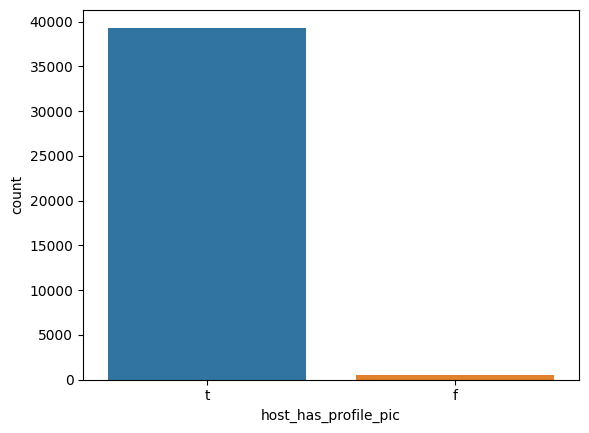

In [13]:
sns.countplot(data=df, x='host_has_profile_pic')

In [14]:
df['host_has_profile_pic'].value_counts()

t    39336
f      495
Name: host_has_profile_pic, dtype: int64

In [15]:
#df.drop('host_has_profile_pic', axis=1)

<AxesSubplot: xlabel='host_identity_verified', ylabel='count'>

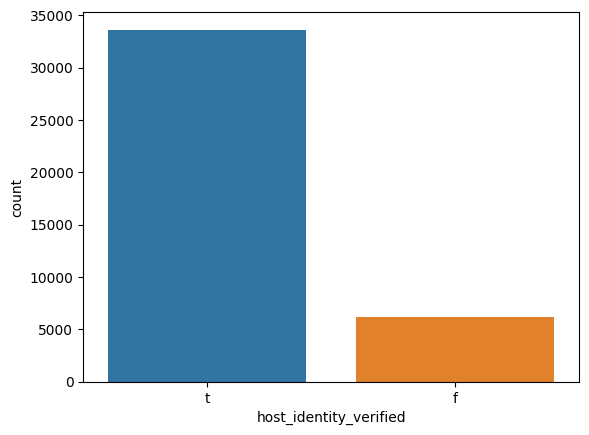

In [16]:
sns.countplot(data=df, x='host_identity_verified')

In [17]:
df['host_identity_verified'].value_counts()

t    33635
f     6196
Name: host_identity_verified, dtype: int64

In [18]:
df.isnull().sum()/(len(df)) * 100

host_response_time               33.971064
host_response_rate               33.971064
host_acceptance_rate             29.740979
host_is_superhost                 0.072716
host_has_profile_pic              0.125373
host_identity_verified            0.125373
neighbourhood_cleansed            0.000000
neighbourhood_group_cleansed      0.000000
property_type                     0.000000
room_type                         0.000000
accommodates                      0.000000
bathrooms                       100.000000
bathrooms_text                    0.210627
bedrooms                          9.485720
beds                              2.216594
amenities                         0.000000
price                             0.000000
minimum_nights                    0.000000
maximum_nights                    0.000000
calendar_updated                100.000000
has_availability                  0.000000
availability_30                   0.000000
availability_60                   0.000000
availabilit

Dsiplays the null values of each feature as a percent of the total observations.

In [19]:
df = df.drop(['calendar_updated', 'bathrooms'], axis=1)

Features with 100% of the instances being null ('calender_updated' and 'bathrooms') are dropped. Later on, we will figure out what to do with the rest of the features containing null values.

In [20]:
df = df.dropna(subset=['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'bathrooms_text'])

Rows are dropped for features where the total percent of null values is less than 1.

In [21]:
df.isnull().sum()/len(df) * 100

host_response_time              33.869223
host_response_rate              33.869223
host_acceptance_rate            29.629909
host_is_superhost                0.000000
host_has_profile_pic             0.000000
host_identity_verified           0.000000
neighbourhood_cleansed           0.000000
neighbourhood_group_cleansed     0.000000
property_type                    0.000000
room_type                        0.000000
accommodates                     0.000000
bathrooms_text                   0.000000
bedrooms                         9.434674
beds                             2.113367
amenities                        0.000000
price                            0.000000
minimum_nights                   0.000000
maximum_nights                   0.000000
has_availability                 0.000000
availability_30                  0.000000
availability_60                  0.000000
availability_90                  0.000000
availability_365                 0.000000
number_of_reviews                0

In [22]:
df = df.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate'], axis=1)

a large portion of these features are null so I chose to drop them instead of filling with a mean

In [23]:
df = df.drop(['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'review_scores_value', 'review_scores_communication', 'reviews_per_month'], axis=1)

I dropped the review scores features becasue there are too many missing values to include it in the model. The null values for all of these features are over 20% of the total.

In [24]:
df = df.dropna(subset=['bedrooms'])

The null Bedrooms rows are drops. We will be using this feature to predict the null beds values

In [25]:
beds_per_bedroom = df.groupby('bedrooms').mean().round()['beds']

C:\Users\riley\AppData\Local\Temp\ipykernel_2800\1892437022.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  beds_per_bedroom = df.groupby('bedrooms').mean().round()['beds']


A beds per bedroom object is created that contains the average beds for each unique bedrooms value.

In [26]:
def fill_beds(beds, bedrooms):
    """Accepts the beds and bedrooms values for the row.
    Checks if the beds is NaN , if so, it returns the avg beds value
    for the corresponding bedrooms value for that row.
    
    average beds here should be a Series or dictionary containing the mapping of the
    groupby averages of beds per bedrooms values."""
    if np.isnan(beds):
        return beds_per_bedroom[bedrooms]
    else:
        return beds

This function will itterate through each row and return the calculated average beds for each value of bedrooms where beds is null. Else the original beds value for that row is returned.

In [27]:
df['beds'] = df.apply(lambda x: fill_beds(x['bedrooms'], x['beds']), axis=1)

The mean rounded up value of beds per bedroom for each unique numnber of bedrooms is filled into the null rows of the beds column using the fill_beds function. 
( Example: A listing with 3 bedrooms and a null beds will be filled with a value of 3 beds. )

In [28]:
df.isnull().sum()/len(df) * 100

host_is_superhost               0.0
host_has_profile_pic            0.0
host_identity_verified          0.0
neighbourhood_cleansed          0.0
neighbourhood_group_cleansed    0.0
property_type                   0.0
room_type                       0.0
accommodates                    0.0
bathrooms_text                  0.0
bedrooms                        0.0
beds                            0.0
amenities                       0.0
price                           0.0
minimum_nights                  0.0
maximum_nights                  0.0
has_availability                0.0
availability_30                 0.0
availability_60                 0.0
availability_90                 0.0
availability_365                0.0
number_of_reviews               0.0
instant_bookable                0.0
dtype: float64

No remaining features have null values. Thats it for preprocessing.

### Feature Engineering

In [29]:
df['bathrooms_text'].head(2)

0    1 shared bath
3        2.5 baths
Name: bathrooms_text, dtype: object

In [30]:
df['bathrooms_text'].value_counts()

1 bath               17823
1 shared bath         9042
2 baths               2582
1 private bath        2542
1.5 baths             1085
2 shared baths        1037
1.5 shared baths       693
2.5 baths              383
3 baths                244
3.5 baths               88
3 shared baths          86
0 shared baths          86
2.5 shared baths        79
4 baths                 65
0 baths                 37
Half-bath               28
4.5 baths               26
Shared half-bath        18
4 shared baths          12
Private half-bath       10
5.5 baths                9
5 baths                  6
6 baths                  6
4.5 shared baths         2
6.5 baths                2
6 shared baths           2
3.5 shared baths         1
7.5 baths                1
7 baths                  1
9.5 baths                1
Name: bathrooms_text, dtype: int64

Instead of turning every unique bathroom value into a dummy variable I chose to split bathrooms feature between shared and private.

In [31]:
def bath_type(bathroom):
    """This function returns a 1 if the bathroom_text string contains the word 
    string and 0 otherwise indicating a private bathroom """
    if "shared" in bathroom:
        return 1
    else:
        return 0

To make a shared_baths feature first I created a function that returns a 1 if the bathroom is shared and 0 otherwise indicating a private bathroom.

In [32]:
df['shared_baths'] = df['bathrooms_text'].apply(bath_type)

The function is then applied to the bathrooms_text column, each row is iterated through.

In [33]:
df['shared_baths'].value_counts()

0    24957
1    11040
Name: shared_baths, dtype: int64

In [34]:
df = df.drop('bathrooms_text', axis=1)

the original bathrooms_text column is finally dropped

<AxesSubplot: xlabel='availability_365', ylabel='Count'>

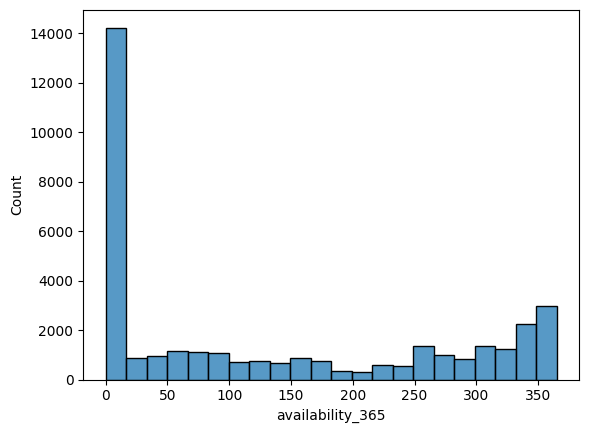

In [35]:
sns.histplot(data=df, x='availability_365')

<AxesSubplot: xlabel='availability_90', ylabel='Count'>

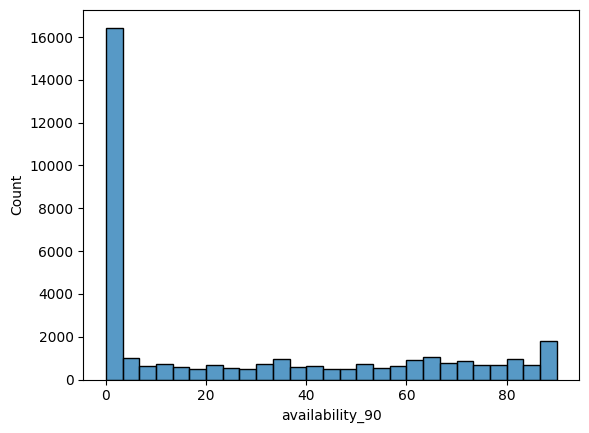

In [36]:
sns.histplot(data = df, x='availability_90')

<AxesSubplot: xlabel='availability_60', ylabel='Count'>

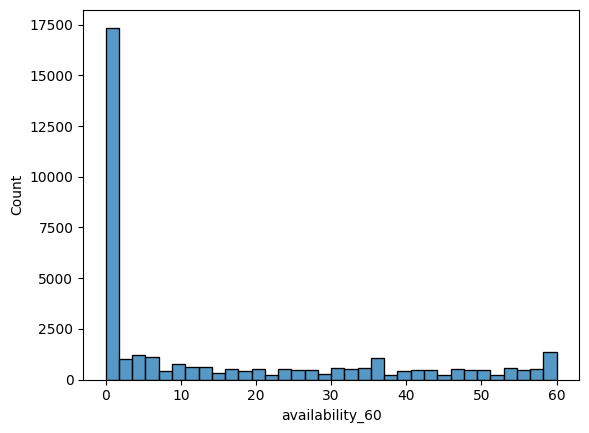

In [37]:
sns.histplot(data = df, x='availability_60')

<AxesSubplot: xlabel='availability_30', ylabel='Count'>

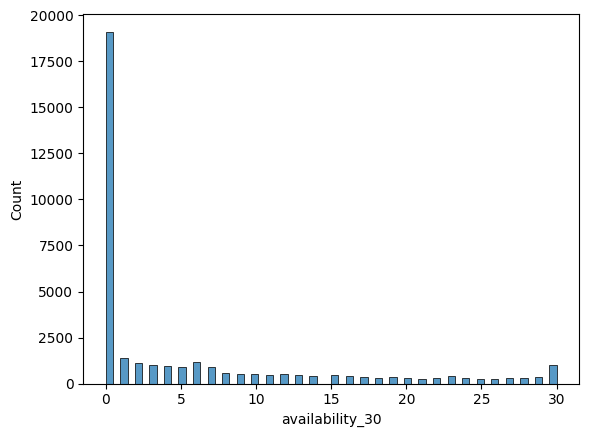

In [38]:
sns.histplot(data = df, x='availability_30')

In [39]:
df['booked_out_of_365'] = 365-df['availability_365']

In [40]:
df['booked_out_of_90'] = 90-df['availability_90']

In [41]:
df['booked_out_of_60'] = 60-df['availability_60']

In [42]:
df['booked_out_of_30'] = 30-df['availability_30']

In [43]:
df = df.drop(['availability_365', 'availability_90', 'availability_60', 'availability_30'],axis=1)

I converted 'avialabilty' to' booked' for all of the 'availability' columns so its easier to interpret.

In [44]:
feat_info('has_availability')

[t=true; f=false]


In [45]:
df[df['has_availability']=='f']['booked_out_of_365'].value_counts()


365    5616
0         1
362       1
140       1
Name: booked_out_of_365, dtype: int64

Since Airbnb doesnt differeientiate between fully booked and unavailabile listings, most of the unavilable listings have a value of booked 365/365 days per year.

<AxesSubplot: xlabel='has_availability', ylabel='count'>

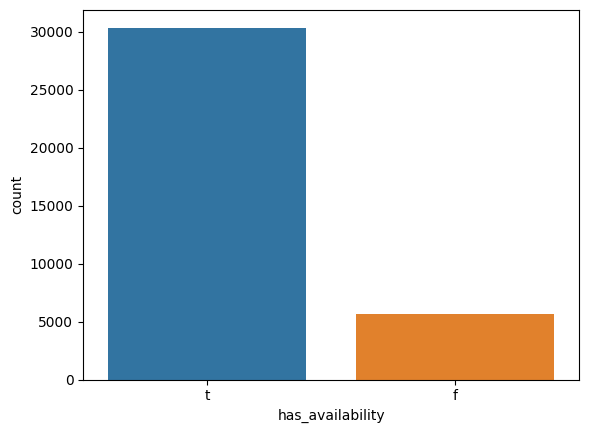

In [46]:
sns.countplot(data=df, x='has_availability')

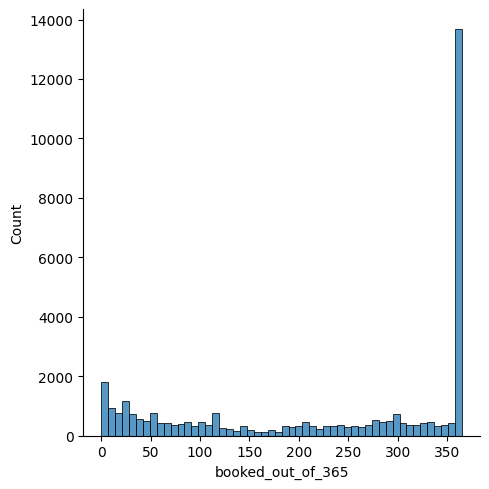

In [47]:
sns.displot(data=df, x='booked_out_of_365', bins=52)

despite most listings have less than a week of availability in the year, bookings are negatively coorelated with price. Higher bookings in a 365, 90, 60, and 30 day period are associated with lower price per nights.

In [48]:
def has_availability_checker(availability):
    """Returns a 1 if has_availabilty is true, 0 otherwise"""
    if availability =='t':
        return 1
    else:
        return 0

In [49]:
df['has_availability'] = df['has_availability'].apply(has_availability_checker)

iterates through each row and returns a 1 where the 'has_availability' column == 't', 0 otherwise. 

<AxesSubplot: xlabel='has_availability', ylabel='count'>

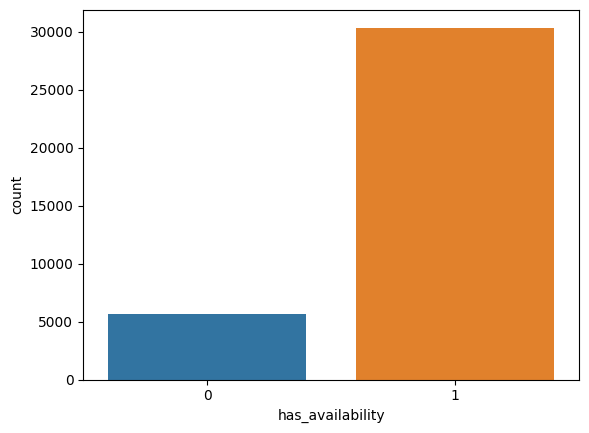

In [50]:
sns.countplot(data=df, x='has_availability')

In [51]:
df.select_dtypes(['object']).columns

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'amenities', 'instant_bookable'],
      dtype='object')

In [52]:
df['host_is_superhost'].value_counts()

f    28517
t     7480
Name: host_is_superhost, dtype: int64

In [53]:
def super_host_checker(host):
    '''Returns a 0 if 'host_is_superhost == 'f', 1 otherwise '''
    if host == 'f':
        return 0
    else:
        return 1

In [54]:
df['host_is_superhost'] = df['host_is_superhost'].apply(super_host_checker)

Itterates through each row and returns a 1 if 'host_is_superhost =='t', otherwise 0

In [55]:
df['host_is_superhost'].value_counts()

0    28517
1     7480
Name: host_is_superhost, dtype: int64

In [56]:
df['host_identity_verified'].value_counts()

t    30355
f     5642
Name: host_identity_verified, dtype: int64

In [57]:
def host_verified_conversion(host):
    '''Returns a 1 if host_identity_verified =='t', 0 otherwise'''
    if host=='t':
        return 1
    else:
        return 0

In [58]:
df['host_identity_verified'] = df['host_identity_verified'].apply(host_verified_conversion)

Itterates through each row and returns a 1 if 'host_identity_verified =='t', otherwise 0

In [59]:
df['host_identity_verified'].value_counts()

1    30355
0     5642
Name: host_identity_verified, dtype: int64

In [60]:
df['neighbourhood_cleansed'].value_counts()

Bedford-Stuyvesant    2654
Williamsburg          2305
Harlem                1762
Bushwick              1599
Upper West Side       1420
                      ... 
Pelham Islands           1
Bull's Head              1
Westerleigh              1
Woodrow                  1
Ferry Point Park         1
Name: neighbourhood_cleansed, Length: 243, dtype: int64

In [61]:
neighbourhood_value_counts = df['neighbourhood_cleansed'].value_counts()
to_remove = neighbourhood_value_counts[neighbourhood_value_counts > 20].index
df = df[df.neighbourhood_cleansed.isin(to_remove)]

Removes neighbourhoods with less than 20 observations. Neighbourhoods when converted to dummy variables that have less than 10 - 20 instances will have almost no predictive power in estimating price.

In [62]:
df['neighbourhood_cleansed'].value_counts()

Bedford-Stuyvesant    2654
Williamsburg          2305
Harlem                1762
Bushwick              1599
Upper West Side       1420
                      ... 
Bayswater               23
Highbridge              23
Mariners Harbor         22
Coney Island            21
Howland Hook            21
Name: neighbourhood_cleansed, Length: 148, dtype: int64

With neighbourhoods with less than 20 observations removed we reduced the number of dummy variables we will have from 243 to 148.

In [63]:
df['neighbourhood_group_cleansed'].value_counts()

Manhattan        14233
Brooklyn         13858
Queens            5743
Bronx             1226
Staten Island      186
Name: neighbourhood_group_cleansed, dtype: int64

In [64]:
df = df.drop('neighbourhood_group_cleansed', axis=1)

Neighbourhood_group_cleasned is dropped from the dataframe becasue the group can be determined from the next level of granularity in the neighbourhood_cleasned feature.

In [65]:
neighbourhood_dummies= pd.get_dummies(df['neighbourhood_cleansed'], drop_first=True)

In [66]:
df = pd.concat([df.drop('neighbourhood_cleansed',axis=1),neighbourhood_dummies],axis=1)

In [67]:
df.shape

(35246, 167)

In [68]:
df['property_type'].value_counts()

Entire rental unit                    13914
Private room in rental unit           10153
Private room in home                   1973
Entire condo                           1478
Entire home                            1302
                                      ...  
Private room in floor                     1
Shared room in floor                      1
Private room in religious building        1
Cave                                      1
Shared room in casa particular            1
Name: property_type, Length: 78, dtype: int64

In [69]:
proprty_type_value_counts = df['property_type'].value_counts()
to_remove_property_type = proprty_type_value_counts[proprty_type_value_counts > 20].index
df = df[df.property_type.isin(to_remove_property_type)]

In [70]:
df['property_type'].value_counts()

Entire rental unit                    13914
Private room in rental unit           10153
Private room in home                   1973
Entire condo                           1478
Entire home                            1302
Private room in townhouse              1033
Entire townhouse                        619
Entire loft                             609
Private room in condo                   579
Room in hotel                           558
Entire serviced apartment               516
Shared room in rental unit              420
Room in boutique hotel                  360
Entire guest suite                      306
Private room in serviced apartment      293
Private room in loft                    265
Private room in guest suite             113
Private room in casa particular          87
Private room in bed and breakfast        63
Entire guesthouse                        51
Entire vacation home                     47
Private room                             47
Shared room in home             

In [71]:
property_type_dummies = pd.get_dummies(df['property_type'], drop_first=True)

In [72]:
df = pd.concat([df.drop('property_type',axis=1),property_type_dummies],axis=1)

In [73]:
df['room_type'].value_counts()

Entire home/apt    18933
Private room       15473
Shared room          497
Hotel room           141
Name: room_type, dtype: int64

In [74]:
df = df.drop('room_type', axis=1)

Room type is dropped becasue we are including dummy variables for property type which is one level of granulaity deeper than room type

In [75]:
df['instant_bookable'].value_counts()

f    25363
t     9681
Name: instant_bookable, dtype: int64

In [76]:
def instant_bookable_checker(listing):
    """Returns a 1 if listing is instant bookable, otherwise 0"""
    if listing =='t':
        return 1
    else:
        return 0


In [77]:
df['instant_bookable'] = df['instant_bookable'].apply(instant_bookable_checker)

Iterates through each row and returns 1 where instant_bookable == 't, Returns 0 otherwise

In [78]:
df['instant_bookable'].value_counts()

0    25363
1     9681
Name: instant_bookable, dtype: int64

In [79]:
def has_profile_pic_checker(pic):
    """Returns a 1 if host_has_profile_pic =='t", otherwise, returns 0"""
    if pic =='t':
        return 1
    else:
        return 0

In [80]:
df['host_has_profile_pic'] = df['host_has_profile_pic'].apply(has_profile_pic_checker)

Iterates through each row and replaces 't' with a '1' and 'f' with '0' in the host_has_profile_pic column.

In [81]:
df.select_dtypes(['object']).columns

Index(['amenities'], dtype='object')

In [82]:
df['amenities'].head(40)

0     ["First aid kit", "Microwave", "Stove", "Coffe...
3     ["Hair dryer", "Essentials", "Carbon monoxide ...
4     ["Hair dryer", "Cable TV", "Refrigerator", "BB...
5     ["First aid kit", "Essentials", "Breakfast", "...
6     ["First aid kit", "Coffee maker", "Gym", "Long...
7     ["Body soap", "Microwave", "Laundromat nearby"...
8     ["Essentials", "Oven", "Cable TV", "Refrigerat...
9     ["Coffee maker", "Gym", "Long term stays allow...
10    ["First aid kit", "Coffee maker", "Gym", "Long...
11    ["Breakfast", "Cable TV", "Elevator", "Heating...
12    ["Hair dryer", "Essentials", "Breakfast", "Ele...
13    ["First aid kit", "Body soap", "Microwave", "L...
14    ["First aid kit", "Fast wifi \u2013 456 Mbps",...
15    ["Microwave", "Stove", "Coffee maker", "Long t...
16    ["Cable TV", "Microwave", "Heating", "Free str...
18    ["First aid kit", "Coffee maker", "Gym", "Long...
19    ["First aid kit", "Body soap", "Microwave", "L...
20    ["Cable TV", "Elevator", "Heating", "Kitch

In [83]:
def elevator_checker(row):
    if 'elevator' in row.lower():
        return 1
    else:
        return 0

In [84]:
def dedicated_workspace_checker(row):
    if 'workspace' in row.lower():
        return 1
    else:
        return 0

In [85]:
def wifi_checker(row):
    """Checks to see if 'wifi' is listed in the ammeneties column. 
    Returns a 1 if True, Otherwise 0"""
    if 'wifi' in row.lower():
        return 1
    else:
        return 0
    

In [86]:
def gym_checker(row):
    '''Checks to see if 'gym' is listed in the ammeneties column. 
    Returns a 1 if True, Otherwise 0"""
    '''
    if "gym" in row.lower():
        return 1
    else:
        return 0

In [87]:
def long_term_checker(row):
    """Checks to see if 'long term stays allowed' is listed in the ammeneties column. 
    Returns a 1 if True, Otherwise 0"""
    if 'long term stays allow' in row.lower():
        return 1
    else:
        return 0


In [88]:
def parking_checker(row):
    '''Checks to see if 'parking' is listed in the ammeneties column. 
    Returns a 1 if True, Otherwise 0'''
    if 'parking' in row.lower():
        return 1
    else:
        return 0

In [89]:
def laundy_checker(row):
    if 'laundr' in row.lower():
        return 1
    else:
        return 0

In [90]:
def cable_checker(row):
    if 'cable' in row.lower():
        return 1
    else:
        return 0

In [91]:
df['elevator'] = df['amenities'].apply(elevator_checker)

In [92]:
df['wifi'] = df['amenities'].apply(wifi_checker)

In [93]:
df['wifi'].value_counts()

1    34284
0      760
Name: wifi, dtype: int64

In [94]:
df['gym'] = df['amenities'].apply(gym_checker)

In [95]:
df['gym'].value_counts()

0    31691
1     3353
Name: gym, dtype: int64

In [96]:
df['parking'] = df['amenities'].apply(parking_checker)

In [97]:
df['parking'].value_counts()

1    17860
0    17184
Name: parking, dtype: int64

In [98]:
df['long_term_stays_allowed'] = df['amenities'].apply(long_term_checker)

In [99]:
df['long_term_stays_allowed'].value_counts()

1    31705
0     3339
Name: long_term_stays_allowed, dtype: int64

In [100]:
df['dedicated_worksapce'] = df['amenities'].apply(dedicated_workspace_checker)

In [101]:
df['dedicated_worksapce'].value_counts()

0    22313
1    12731
Name: dedicated_worksapce, dtype: int64

In [102]:
df['laundry'] = df['amenities'].apply(laundy_checker)

In [103]:
df['laundry'].value_counts()

0    27933
1     7111
Name: laundry, dtype: int64

In [104]:
df['cable'] = df['amenities'].apply(cable_checker)

In [105]:
df['cable'].value_counts()

0    28800
1     6244
Name: cable, dtype: int64

In [106]:
df = df.drop('amenities', axis=1)

In [107]:
df.corr()['price'].sort_values()

shared_baths                  -0.193994
Private room in rental unit   -0.179638
booked_out_of_30              -0.156244
booked_out_of_60              -0.133568
booked_out_of_90              -0.122925
                                 ...   
gym                            0.145864
beds                           0.277194
bedrooms                       0.277194
accommodates                   0.321033
price                          1.000000
Name: price, Length: 201, dtype: float64

In [108]:
df.shape

(35044, 201)

### Train Test Split

In [109]:
X = df.drop('price', axis=1)
y = df['price']

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

### Scaling the Data

In [112]:
from sklearn.preprocessing import MinMaxScaler

In [113]:
scaler = MinMaxScaler()

In [114]:
X_train = scaler.fit_transform(X_train)

In [115]:
X_test =scaler.fit_transform(X_test)

In [116]:
X_train.shape

(24530, 200)

In [117]:
X_test.shape

(10514, 200)

### Creating the First Model

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [119]:
model = Sequential()

In [120]:
model = Sequential()

model.add(Dense(201,activation='relu'))


model.add(Dense(101,activation='relu'))


model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [121]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=20)

Epoch 1/20
192/192 [==============================] - 1s 3ms/step - loss: 123679.6719 - val_loss: 135904.9531
Epoch 2/20
192/192 [==============================] - 0s 2ms/step - loss: 100882.4219 - val_loss: 126210.8516
Epoch 3/20
192/192 [==============================] - 0s 2ms/step - loss: 94083.2578 - val_loss: 121918.5000
Epoch 4/20
192/192 [==============================] - 0s 2ms/step - loss: 90539.7891 - val_loss: 120458.8438
Epoch 5/20
192/192 [==============================] - 0s 2ms/step - loss: 88694.9531 - val_loss: 118597.3047
Epoch 6/20
192/192 [==============================] - 0s 2ms/step - loss: 87514.8203 - val_loss: 117890.1406
Epoch 7/20
192/192 [==============================] - 0s 2ms/step - loss: 86637.6875 - val_loss: 117160.3828
Epoch 8/20
192/192 [==============================] - 0s 2ms/step - loss: 85759.6562 - val_loss: 116646.7734
Epoch 9/20
192/192 [==============================] - 0s 2ms/step - loss: 85314.0781 - val_loss: 116481.1094
Epoch 10/20
192/1

<AxesSubplot: >

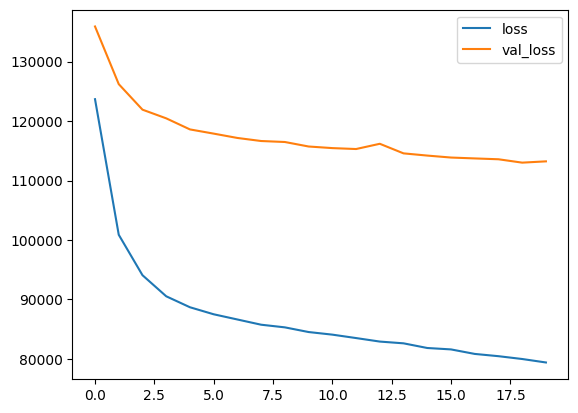

In [122]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [123]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [124]:
predictions = model.predict(X_test)

329/329 [==============================] - 0s 963us/step


In [125]:
mean_absolute_error(y_test, predictions)

86.19501252743099

In [126]:
np.sqrt(mean_squared_error(y_test,predictions))

336.4918666685583

In [127]:
explained_variance_score(y_test,predictions)

0.2304909932999749

In [128]:
df['price'].mean()

197.50793288437393

In [129]:
df['price'].median()

130.0

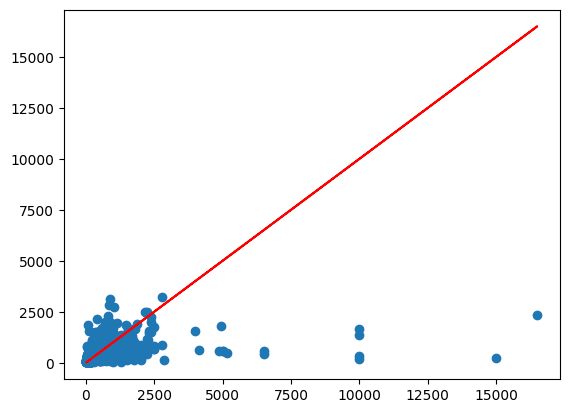

In [130]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

It looks like the vast majority of listings are less than $2000 per night and a few outliers are skewing the performance of our model.

In [131]:
errors = y_test.values.reshape(10514, 1) - predictions

C:\Users\riley\AppData\Local\Temp\ipykernel_2800\2392254718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<AxesSubplot: ylabel='Density'>

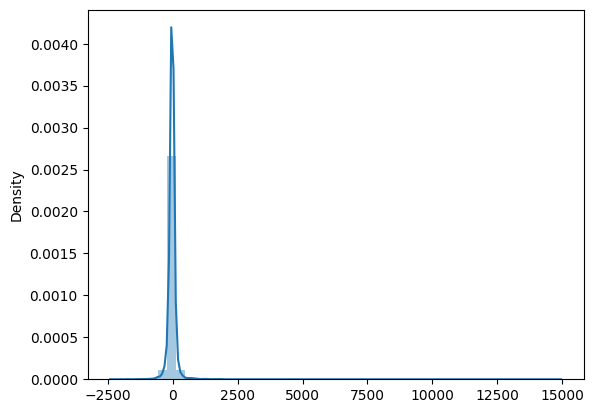

In [132]:
sns.distplot(errors)

<AxesSubplot: xlabel='price', ylabel='Count'>

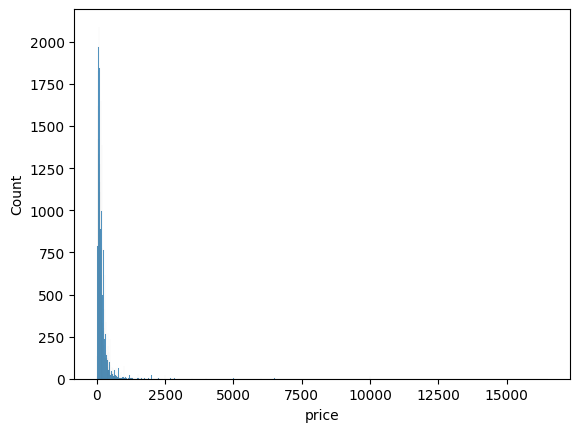

In [133]:
sns.histplot(data=df, x='price')

### Model #2
predicting prices of listings that fall between 25 and 1000 dollars per night

In [134]:
df_filtered  = df[df['price'] <= 1000]
df_filtered = df_filtered[df_filtered['price']> 25]

Price per listings has a significant skew to the right, filtering out these outliers should greatly improve the price prediction performance of the model

In [135]:
df_filtered['price'].max()

1000.0

In [136]:
df_filtered['price'].value_counts().sort_values(ascending=False).head(30)

150.0    977
100.0    850
200.0    773
50.0     672
60.0     654
75.0     654
80.0     648
70.0     595
65.0     559
120.0    546
90.0     530
250.0    529
125.0    480
55.0     476
85.0     446
175.0    437
45.0     426
40.0     385
99.0     362
95.0     357
130.0    356
110.0    341
300.0    336
140.0    301
180.0    291
160.0    288
115.0    271
225.0    270
199.0    258
135.0    233
Name: price, dtype: int64

<AxesSubplot: xlabel='price', ylabel='Count'>

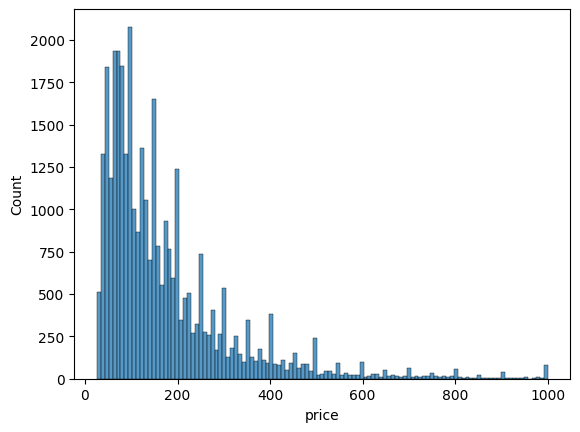

In [137]:
sns.histplot(data=df_filtered, x='price')

The new distribution of price/night of our dataset

In [138]:
df_filtered.shape

(34520, 201)

In [139]:
X = df_filtered.drop('price', axis=1)
y = df_filtered['price']

### Train Test Split #2

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

### Scaling the Data #2

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
scaler = MinMaxScaler()

In [144]:
X_train = scaler.fit_transform(X_train)

In [145]:
X_test = scaler.fit_transform(X_test)

### Model Creation #2

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [147]:
X_train.shape

(24164, 200)

In [148]:
X_test.shape

(10356, 200)

In [149]:
model = Sequential()

model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [150]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=15)

Epoch 1/15
189/189 [==============================] - 1s 4ms/step - loss: 26925.8711 - val_loss: 13781.0957
Epoch 2/15
189/189 [==============================] - 1s 3ms/step - loss: 12250.0117 - val_loss: 10431.6641
Epoch 3/15
189/189 [==============================] - 1s 3ms/step - loss: 10436.2275 - val_loss: 9847.3027
Epoch 4/15
189/189 [==============================] - 1s 3ms/step - loss: 9818.0908 - val_loss: 9908.2607
Epoch 5/15
189/189 [==============================] - 1s 3ms/step - loss: 9516.7207 - val_loss: 9705.3164
Epoch 6/15
189/189 [==============================] - 1s 3ms/step - loss: 9491.3428 - val_loss: 9507.6436
Epoch 7/15
189/189 [==============================] - 1s 3ms/step - loss: 9308.9141 - val_loss: 9718.6895
Epoch 8/15
189/189 [==============================] - 1s 3ms/step - loss: 9251.8438 - val_loss: 9455.7041
Epoch 9/15
189/189 [==============================] - 1s 3ms/step - loss: 9113.3359 - val_loss: 9664.9922
Epoch 10/15
189/189 [====================

<AxesSubplot: >

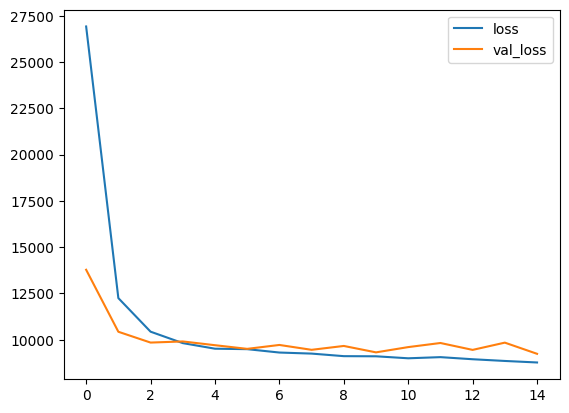

In [151]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [152]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [153]:
predictions = model.predict(X_test)

324/324 [==============================] - 0s 1ms/step


In [154]:
mean_absolute_error(y_test, predictions)

56.56367759791614

In [155]:
np.sqrt(mean_squared_error(y_test,predictions))

96.12543086195735

In [156]:
explained_variance_score(y_test,predictions)

0.5724630795008752

In [157]:
df_filtered['price'].mean()

173.37479721900348

In [158]:
df_filtered['price'].median()

128.0

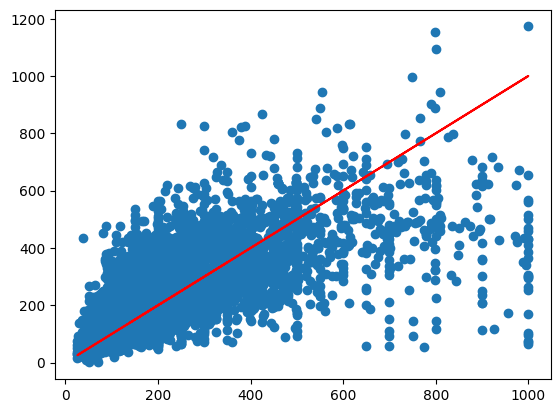

In [159]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [160]:
errors = y_test.values.reshape(10356, 1) - predictions

C:\Users\riley\AppData\Local\Temp\ipykernel_2800\2392254718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<AxesSubplot: ylabel='Density'>

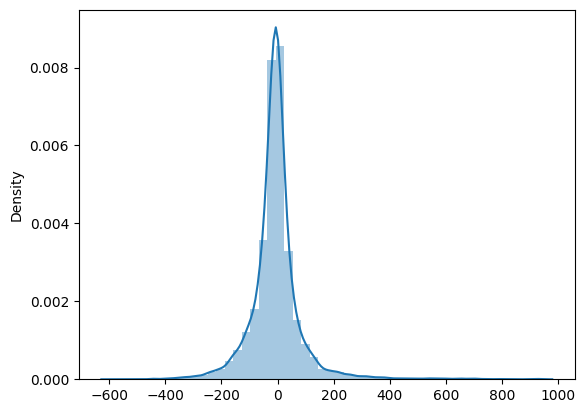

In [161]:
sns.distplot(errors)

In [162]:
df_filtered['price'].describe()

count    34520.000000
mean       173.374797
std        146.785428
min         26.000000
25%         75.000000
50%        128.000000
75%        214.000000
max       1000.000000
Name: price, dtype: float64

In [163]:
df_filtered2 = df_filtered[df_filtered["price"] <= 600]
df_filtered2 = df_filtered2[df_filtered2['price'] >= 25]

In [164]:
df_filtered2['price'].sort_values()

22384     26.0
4710      26.0
26436     26.0
7464      26.0
10639     26.0
         ...  
26348    600.0
38079    600.0
25608    600.0
23354    600.0
1933     600.0
Name: price, Length: 33725, dtype: float64

<AxesSubplot: xlabel='price', ylabel='Count'>

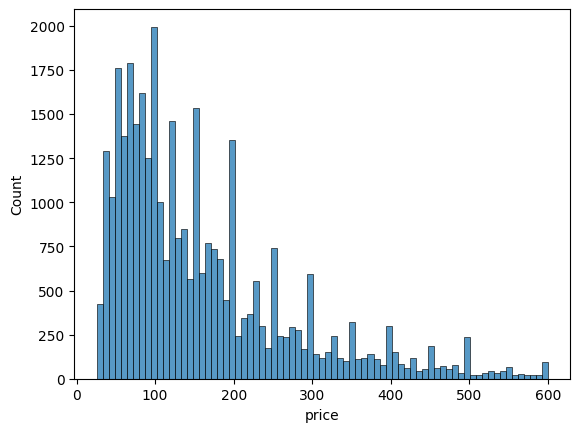

In [165]:
sns.histplot(data=df_filtered2, x='price')

In [166]:
df_filtered2.shape

(33725, 201)

In [167]:
X = df_filtered2.drop('price', axis=1)
y = df_filtered2['price']

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [170]:
from sklearn.preprocessing import MinMaxScaler

In [171]:
scaler = MinMaxScaler()

In [172]:
X_train = scaler.fit_transform(X_train)

In [173]:
X_test = scaler.fit_transform(X_test)

In [174]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [175]:
X_train.shape

(23607, 200)

In [176]:
X_test.shape

(10118, 200)

In [177]:
model = Sequential()

model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [178]:
 #from tensorflow.keras.callbacks import EarlyStopping

In [179]:
#early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [180]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=17,
          batch_size = 128,
          validation_data=(X_test, y_test),
          #callbacks=[early_stop]
          )

Epoch 1/17
185/185 [==============================] - 1s 4ms/step - loss: 17765.3320 - val_loss: 7644.7100
Epoch 2/17
185/185 [==============================] - 1s 3ms/step - loss: 6589.5898 - val_loss: 5613.4092
Epoch 3/17
185/185 [==============================] - 1s 3ms/step - loss: 5627.8418 - val_loss: 5115.4321
Epoch 4/17
185/185 [==============================] - 1s 3ms/step - loss: 5331.3569 - val_loss: 4928.4673
Epoch 5/17
185/185 [==============================] - 1s 3ms/step - loss: 5172.1538 - val_loss: 4820.5522
Epoch 6/17
185/185 [==============================] - 1s 3ms/step - loss: 5087.3481 - val_loss: 4750.3784
Epoch 7/17
185/185 [==============================] - 1s 3ms/step - loss: 5019.2603 - val_loss: 4685.4858
Epoch 8/17
185/185 [==============================] - 1s 4ms/step - loss: 4955.1660 - val_loss: 4668.1440
Epoch 9/17
185/185 [==============================] - 1s 3ms/step - loss: 4932.4663 - val_loss: 4646.7046
Epoch 10/17
185/185 [========================

<AxesSubplot: >

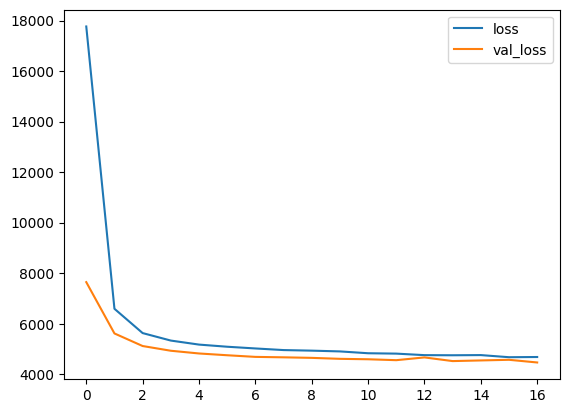

In [181]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [182]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [183]:
predictions = model.predict(X_test)

317/317 [==============================] - 1s 2ms/step


In [184]:
mean_absolute_error(y_test, predictions)

44.395746671227414

In [185]:
np.sqrt(mean_squared_error(y_test,predictions))

66.81373215679574

In [186]:
explained_variance_score(y_test,predictions)

0.6532058683034618

In [187]:
df_filtered2['price'].mean()

159.12329132690883

In [188]:
df_filtered2['price'].median()

125.0

In [194]:
df_filtered2['price'].std()

113.54591577753862

In [202]:
import plotly.express as px

In [204]:
px.box(df_filtered2, y='price', points='outliers')

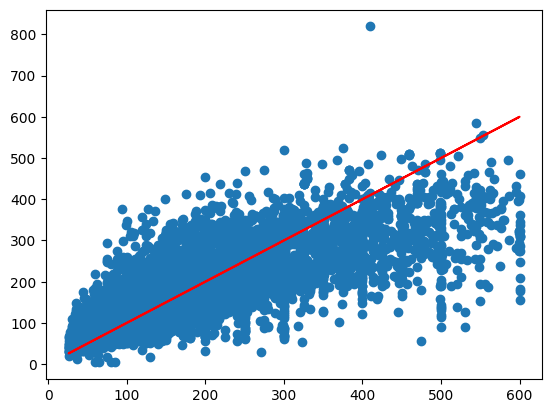

In [190]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [191]:
errors = y_test.values.reshape(10118, 1) - predictions

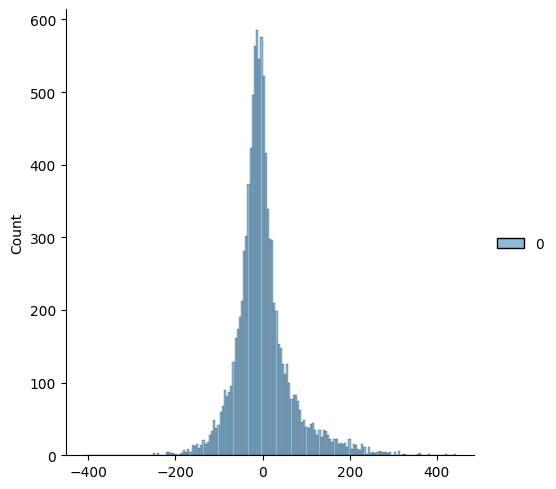

In [192]:
sns.displot(errors)